In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('D:\Assesment\data\Bengaluru_House_Data.csv')

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape

(13320, 9)

In [4]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
data['society']= data['society'].fillna('Normal')

In [7]:
data['balcony']= data['balcony'].fillna(0)

In [9]:
data['bath']= data['bath'].fillna(1.0)

In [10]:
data.isnull().sum()

area_type        0
availability     0
location         1
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [11]:
data= data.dropna()

In [12]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [13]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Normal,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Normal,1200,2.0,1.0,51.00


In [14]:
# sepreting categorical and numerical columns
categorical_columns= data.columns[data.dtypes=='object']
numerical_columns=data.columns[data.dtypes!='object']

In [15]:
data[categorical_columns].describe()

,area_type,availability,location,size,society,total_sqft
count,13303,13303,13303,13303,13303,13303
unique,4,80,1304,31,2677,2110
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,Normal,1200
freq,8789,10580,539,5199,5499,843


In [16]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13303.0,2.685334,1.343187,1.0,2.0,2.0,3.0,40.0
balcony,13303.0,1.513719,0.863189,0.0,1.0,2.0,2.0,3.0
price,13303.0,112.584033,148.993820,8.0,50.0,72.0,120.0,3600.0


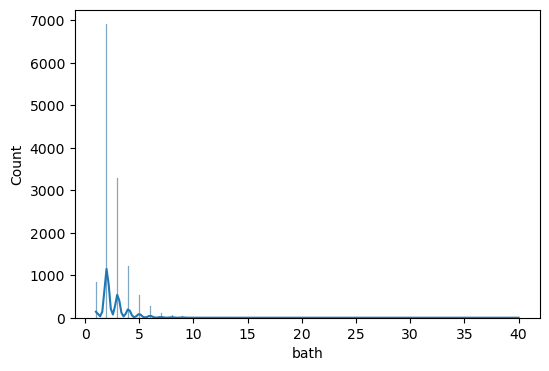

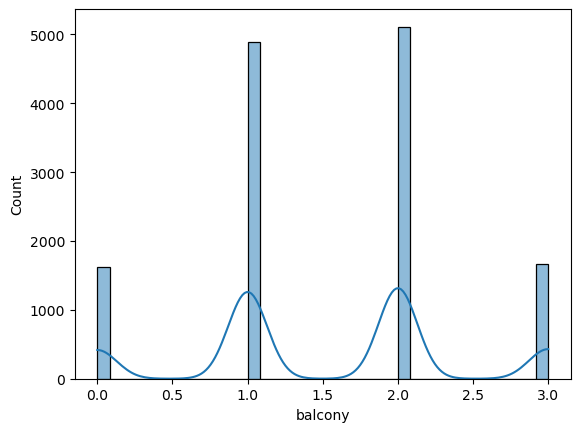

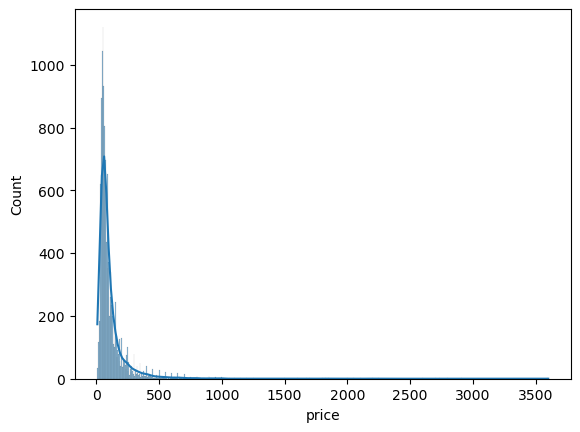

In [17]:
# Numerical Data
plt.figure(figsize=(6,4))

for col in numerical_columns:
    sns.histplot(data= data,x= col, kde= True)
    print('\n')
    plt.show()

In [18]:
categorical_columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['area_type']=le.fit_transform(data['area_type'])
data['availability']=le.fit_transform(data['availability'])
data['location']=le.fit_transform(data['location'])
data['size']=le.fit_transform(data['size'])
data['society']=le.fit_transform(data['society'])
data['total_sqft']=le.fit_transform(data['total_sqft'])

In [20]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,40,419,13,460,70,2.0,1.0,39.07
1,2,79,317,19,2428,1282,5.0,3.0,120.00
2,0,79,1178,16,1420,512,2.0,3.0,62.00
3,3,79,756,16,2175,599,3.0,1.0,95.00
4,3,79,715,13,1420,239,2.0,1.0,51.00


In [21]:
X=data.drop(labels=['price'],axis=1)

In [22]:
X

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,3,40,419,13,460,70,2.0,1.0
1,2,79,317,19,2428,1282,5.0,3.0
2,0,79,1178,16,1420,512,2.0,3.0
3,3,79,756,16,2175,599,3.0,1.0
4,3,79,715,13,1420,239,2.0,1.0
...,...,...,...,...,...,...,...,...
13315,0,79,1251,22,207,1493,4.0,0.0
13316,3,79,1003,18,1420,1529,5.0,0.0
13317,0,79,971,13,1211,172,2.0,1.0
13318,3,32,906,18,2194,1674,4.0,1.0


In [23]:
y= data['price']

In [24]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13303, dtype: float64

In [25]:
# Spliting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=30)

In [26]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [37]:
from sklearn.metrics import r2_score,accuracy_score

In [29]:
from sklearn.svm import SVR 
svr= SVR()
svr.fit(X_train,y_train)

SVR()

In [30]:
y_pred=svr.predict(X_test)

In [36]:
r2_score(y_test,y_pred)

0.03108441892217073